In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 18240
team_id = 169 # 180/169
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g)

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=team_id)
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

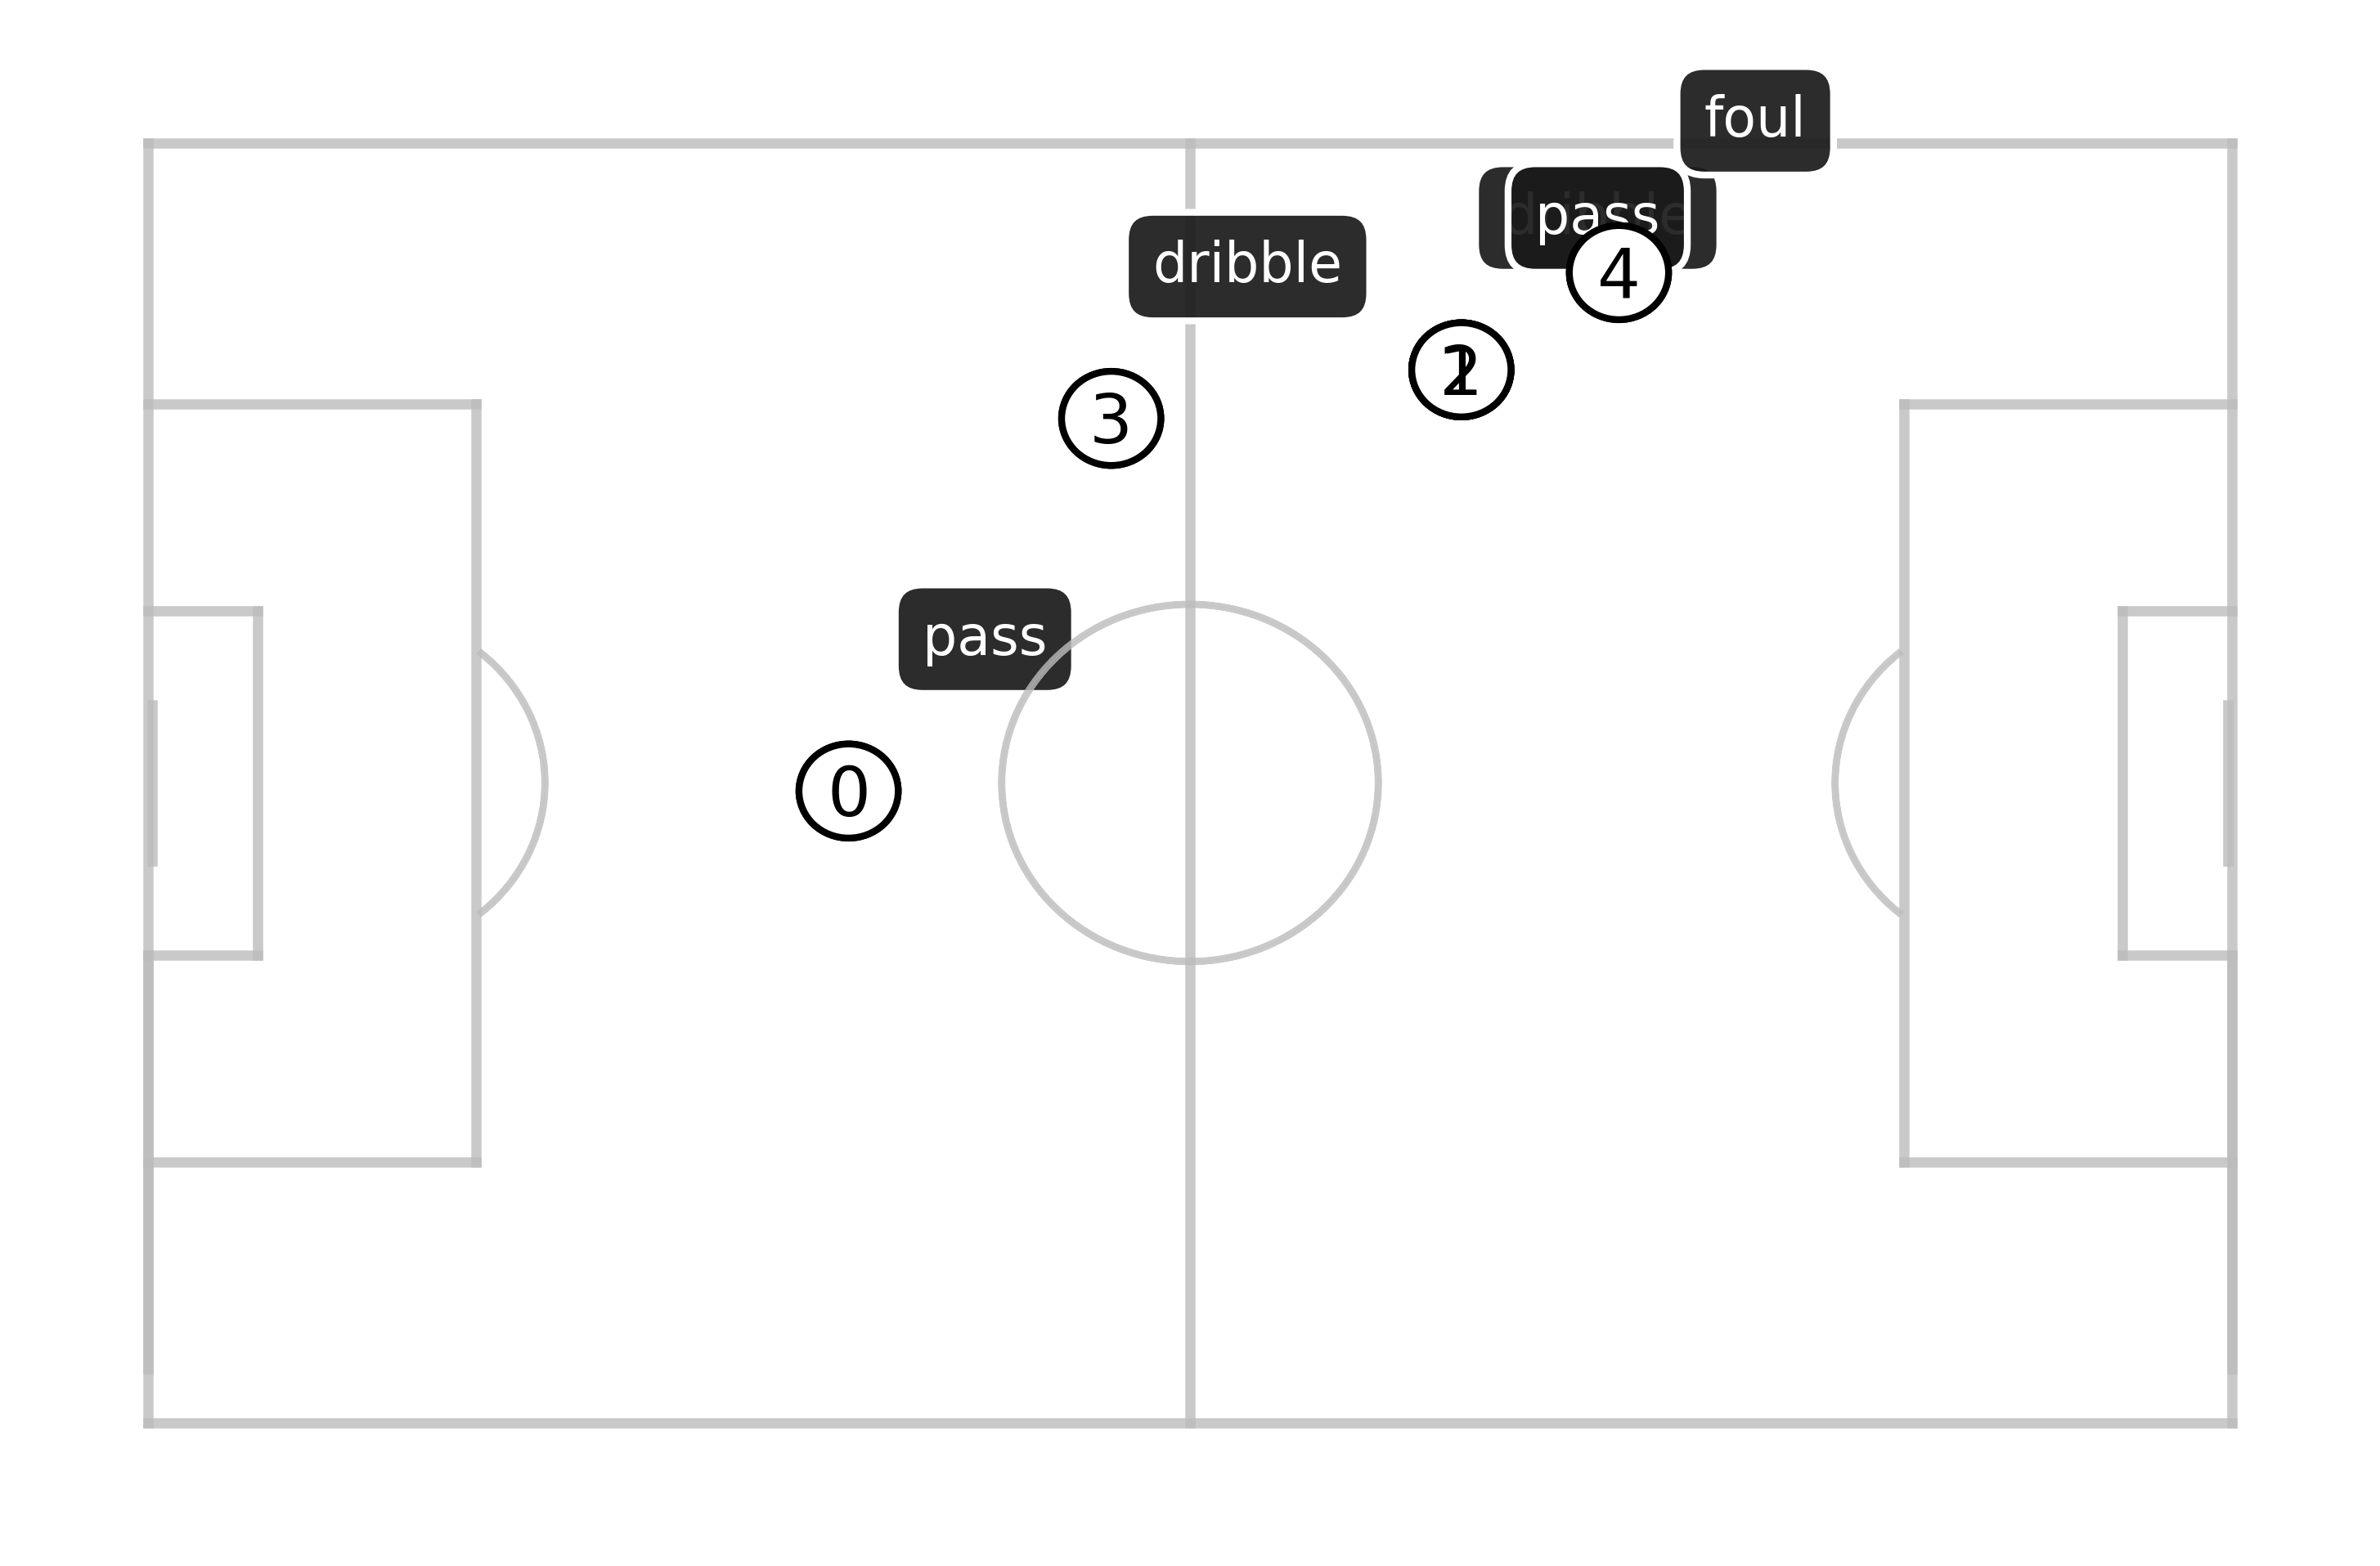

In [6]:
import statsbombplot as pys

pys.draw_svg_actions(df_actions, 1700)